In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

# Boston Housing with Linear Regression

In this notebook we will work with the classic [Boston Housing dataset](https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset). 

Let's load the data and takea look at the information.

In [2]:
data = load_boston()

In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
X = data.data
y = data.target

In [6]:
print(type(y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Explore the data

The first step of any machine learnign project is to explore the data a little bit. We already have a general idea because of the description given to us, but let's dig in a tiny bit more.

In [7]:
# printing the shape of your X matrix is always a good idea.
X.shape

(506, 13)

We have 506 samples (housing records) and 13 columns (features).

In [8]:
y.shape

(506,)

In [9]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

These are the 506 "labels" or put another way "thing we are interested in predicting".  In this case they are median housing prices, that is the price that the house sold for.

Let's put our data into a dataframe with pandas and examine the first 5 rows of each.

In [10]:
X = pd.DataFrame(X, columns=data.feature_names) # little trick to get the column names in correctly
y = pd.Series(y)

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

Ok, so we can glance over the first 5 rows just to get a "feel" for the data, do we notice anything interesting? Well we see that the range of the values for each column is quite different, we need to deal with that. So we can add scaling our data to a list of things to do.  Before we run off and start scaling though, let's take a look at some basic statistics.

### pandas.DataFrame.describe()

This function is very useful to get a "feeling" for the dataset that you are working with.  Describe will give you thec ommon statistics of your matrix, the mean, std (standard deviation), min, max, and quantiles.  It's nice to scroll through and see if anything interesting pops out.  Looking through the output below, do you notice anything interesting?

In [13]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<AxesSubplot:>

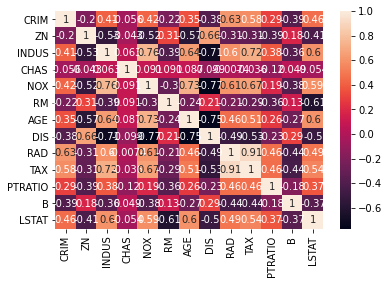

In [14]:
#X.corr()
sns.heatmap(X.corr(), annot=True)

<AxesSubplot:>

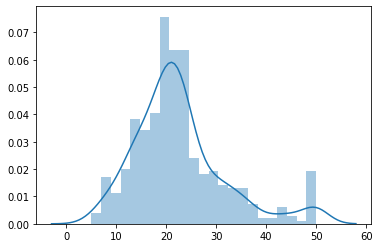

In [15]:
sns.distplot(y)

Just a few observations that I see.  The `B` column has most of it's data centered around 375-400 range, we can tell this because it's 25-max quantiles are all in that range. That means anything out of that range is probably an outlier.  The standard deviation for age is 28, which is nearly 50% of it's mean (60), which means that the `AGE` column probably has a _lot_ of variation in it. Finally just scanning the `count` row, they all have 506, which means we don't have any missing values, but we should double check that.  Note that these kinds of observations may lead nowhere or they may lead somewhere.  Getting to know your data is very important, maybe the most important thing you can do as a data scientist. So definitely take your time and write down your thoughts.

Let's check for any empty values in our data now.

In [16]:
X.info() # this is a simple function that will get us some basic info about our dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [17]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## Scaling our dataset

Ok, we need to scale our dataset.  We learned about two choices so you can pick from two options!

* StandardScaler
* MinMaxScaler

The order of operations goes like this:
1. initialize a scaler
2. call `fit` on our dataset
3. transform our dataset and return that value to a new variable.

Note: `.fit` and `.transform` are called seperately for some sneaky tricky reasons we will get into a bit later. For now just think to yourself about _why_ sklearn _might_ have seperate `.fit` and `.transform` functions on it's scalers.

In [18]:
## initialize a scaler here

scaler = StandardScaler()# your choice of scaler here (check the imports to remember their names)

In [19]:
## fit your scaler here -- fitting happens "in place" which means it doesn't return anything

scaler.fit(X)  # this is not actually training

StandardScaler()

In [20]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
## transform our dataset now and return the value

X_transformed = scaler.transform(X) #use the scaler transform function on our dataset to return a new dataset

In [22]:
xt_df = pd.DataFrame(X_transformed, columns=data.feature_names)

In [23]:
xt_df.head()
#xt_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


# Train a model

Ok it's time to train our model.  We will want to choose one of the three options we imported earlier.

* LinearRegression
* SGDRegressor
* Ridge

## Scikit-Learn API 

Many (most?) objects in scikit-learn have a `.fit` method which will tell the model to do whatever it was designed to learn.  From the objects that have a `.fit` method, you will get either a follow up `.transform` or `.predict` method.  Objects with `.transform` are transfromers (like the scaler we just used), their job is to learn some statistics from the data and transform it according to some logic (using the statistics that were learned).  Objects that have a `.predict` method are machine learning algorithms, and when you call `.fit` on them they are going to learn whatever rules / functions that the algorithm is designed to learn. When you call `.predict` with them, they will take as input a data point(s) and give you a prediction(s) for the input.

So, in summary we frequently see three methods

* `.fit` : this tells the object to learn
* `.transform` : this tells the object to apply it's learning in the form a transformation to the input. This method _returns_ an object (the transformed data
* `.predict` : this tells the object to make a prediction on the input, using whatever function the model learned (from the `.fit` call it made earlier)

In [24]:
# initialize a model here
reg = Ridge()# initialize your model here

In [25]:
# Train your model here with .fit
reg.fit(X_transformed, y)

Ridge()

## umm... are we done?
So we fit a model right? Now unlike our previous work, we can't really plot this model, it's not a line in 2d, it's a plane in 13d.  So what can we do?  We need to evaluate our model somehow! What should we do?
How about we make a bunch of predictions and see what kind of accuracy it gets?  We can evaluate it's mean-squared error, the same metric we used to optimize it.

# Evaluate our model

Ok, let's use our trained model to make predictions, then we can evaluate those predictions against the real known `y` values. You will need to use your models `.predict()` function which needs some input to predict on.

In [26]:
## use your model to make predictions on the data

y_pred = reg.predict(X_transformed) # your model.predict here  

In [27]:
y_pred[:10]

array([30.02866073, 25.02311238, 30.56915187, 28.62324549, 27.96402533,
       25.26682656, 23.00591857, 19.55263233, 11.55420313, 18.94164578])

Ok now we need to evaluate our predictions. We will use scikit-learns inbuilt mean squared error metric for this. It's very important that you pass your arguments correctly to the evaluation function, all scikit-learn metrics use `y_true, y_pred` format, which means pass the ground-truth first, followed by the prediction.

Well, actually in this case MSE is the same regardless which argument goes first because of the way the math works out, but that isn't always the case.

In [28]:
score = mean_squared_error(y, y_pred)
print (f"the MSE is:{score}")

the MSE is:21.895862166800143


## That's a wrap!

So.. are we done now? Are you happy with our model?  What does our MSE even mean? Is it good? Is it bad? Would you be ready to roll this model out to production?
What questions do you have?
There can certainly be a lot wrong with what we have done so far, but I'm not sure what it is. Do you have some idea?

Fundamentally I think our work has been sound, in the sense that we used all the tools without getting any errors right?  So what could be the problem?


## Please go on the forums and post about this question

Try not to read other peoples response who are ahead of you in the course.  In fact, when you get ahead make sure to help the newbies out and not spoil the surprise for them!

What is the funny feeling in our stomach from? What "smells" wrong here?

[LINK TO FORUM TOPIC](https://forum.codingnomads.co/t/post-your-answer-to-the-question-what-is-funny-in-my-boston-housing-problem-is-my-model-good/344)

## Bonus work
Try fitting all the 3 different models we created.  Further, see if you can make the MSE lowes by adjusting any of the parameters (regularization?) that we have learned about so far.